In [46]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [47]:
PATH = '/global/homes/v/vboehm/codes/MADLens/mem_profiles'

In [3]:
! ls /global/homes/v/vboehm/codes/MADLens/mem_profiles

mem_11box.log	mem_baseline.log	    mem_noevolution.log
mem_132box.log	mem_baseline_interp.log     mem_vjp.log
mem_1box.log	mem_baseline_interp_40.log  mem_vjpjvp.log


In [4]:
def build_df(Lines):
    names = [Line.split(' ')[1] for Line in Lines]
    rss_inc = [float(re.findall(r'\srss\_inc\s([\-\d\.]+)\s', Line)[0]) for Line in Lines]
    rss_inc_corr = [float(re.findall(r'\srss\_inc\_corr\s([\-\d\.]+)\s', Line)[0]) for Line in Lines]
    rss_tot = [float(re.findall(r'\srss\s([\-\d\.]+)\s', Line)[0]) for Line in Lines]
    srss = [float(re.findall(r'\ssrss\_inc\s([\-\d\.]+)\s', Line)[0]) for Line in Lines]
    srss_tot = [float(re.findall(r'\ssrss\s([\-\d\.]+)\s', Line)[0]) for Line in Lines]
    count = [int(Line.split(' ')[0]) for Line in Lines]
    line = [re.findall(r'\((\d+)\,', line)[0] for line in Lines]
    f = [re.findall(r'[\'\"]\s+(\w.*)\\', Line)[0] for Line in Lines]
    return pd.DataFrame({'name':names, 'line':line, 'function':f, 'rss_inc_old': rss_inc, 'rss_tot':rss_tot, 'rss_inc':rss_inc_corr,'srss_inc':srss,
                        'srss_tot':srss_tot, 'rss_diff': np.array(rss_inc_corr)-np.array(rss_inc)})

def read_write_return(filei):
    filei = open(filei, 'r') 
    lines = filei.readlines()
    df = build_df(lines)
    return df

In [5]:
mb_per_mesh=128**3*np.float64(5).itemsize/1e6

In [6]:
mb_per_pos=(128)**3*3*np.float64(5).itemsize/1e6

### baseline without evolution

In [7]:
df_noevo =read_write_return(os.path.join(PATH,'mem_noevolution.log'))


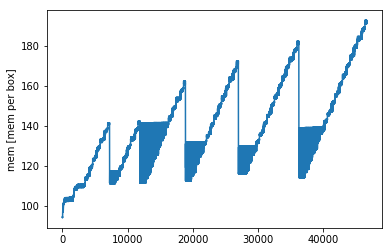

In [9]:
#seems to show 11 steps, only final ones get projected
plt.plot(df_noevo['rss_tot']*32/mb_per_pos)
plt.ylabel('mem [mem per box]')
plt.show()

### with interpolation and 40 steps

In [158]:
df_baseline_interp =read_write_return(os.path.join(PATH,'mem_baseline_interp_40.log'))

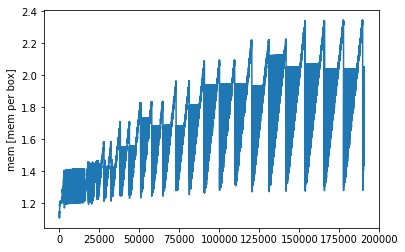

In [159]:
#seems to show 11 steps, only final ones get projected
plt.plot(df_baseline_interp['rss_tot']/mb_per_mesh)
plt.ylabel('mem [mem per box]')
plt.show()

### with vjp

In [162]:
df_vjp =read_write_return(os.path.join(PATH,'mem_vjpjvp.log'))

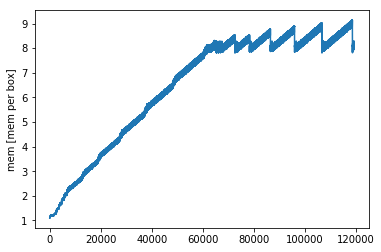

In [163]:
#seems to show 11 steps, only final ones get projected
plt.plot(df_vjp['rss_tot']/mb_per_mesh)
plt.ylabel('mem [mem per box]')
plt.show()

### baseline

In [129]:
df_baseline =read_write_return(os.path.join(PATH,'mem_baseline.log'))

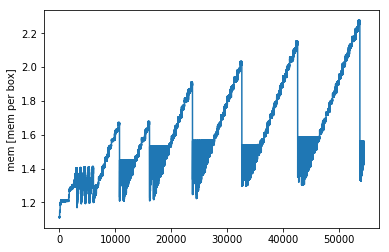

In [130]:
#seems to show 11 steps, only final ones get projected
plt.plot(df_baseline['rss_tot']/mb_per_mesh)
plt.ylabel('mem [mem per box]')
plt.show()

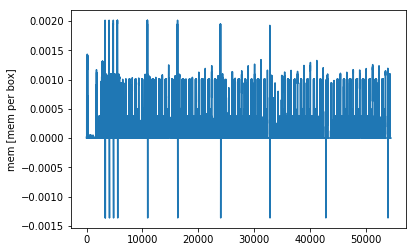

In [133]:
plt.plot(df_baseline['rss_inc']/mb_per_mesh/32)
plt.ylabel('mem [mem per box]')
plt.show()

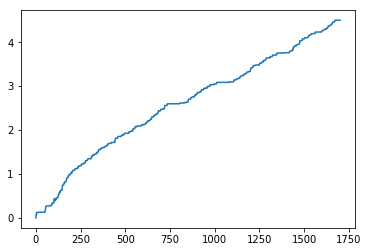

In [152]:
a=df_baseline['rss_inc']/mb_per_mesh
plt.plot(np.cumsum(np.asarray(a)[::32]))

### 1 box test 32 procs

In [150]:
df_1_32 =read_write_return(os.path.join(PATH,'mem_132box.log'))

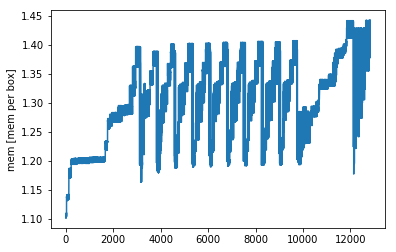

In [151]:
plt.plot(df_1_32['rss_tot']/mb_per_mesh)
plt.ylabel('mem [mem per box]')
plt.show()

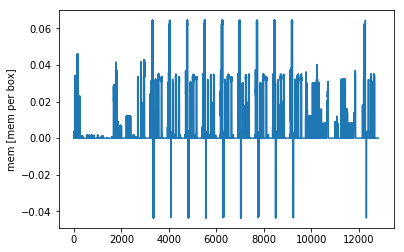

In [137]:
plt.plot(df_1_32['rss_inc']/mb_per_mesh)
plt.ylabel('mem [mem per box]')
plt.show()

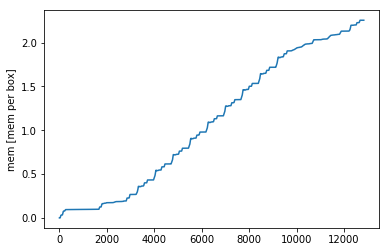

In [140]:
plt.plot(np.cumsum(df_1_32['rss_inc']/mb_per_mesh)/32)
plt.ylabel('mem [mem per box]')
plt.show()

### 1 box test 1 procs

In [10]:
df_1_1 =read_write_return(os.path.join(PATH,'mem_11box.log'))

In [11]:
df_1_1

,name,line,function,rss_inc_old,rss_tot,rss_inc,srss_inc,srss_tot,rss_diff
0,apply_transfer-apl,338,"p = apply_transfer(rhok, fourier_space_laplace)",16.883712,280.510464,16.883712,0.000000,40.300544,0.000000
1,decompose-apl,340,"layout = decompose(q, pm)",35.332096,315.842560,35.332096,0.057344,40.357888,0.000000
2,apply_transfer-apl,344,"dx1_c = apply_transfer(p, fourier_space_neg_gr...",0.000000,315.842560,0.000000,0.000000,40.357888,0.000000
3,c2r-apl,345,dx1_r = c2r(dx1_c),16.920576,332.763136,16.920576,0.032768,40.390656,0.000000
4,readout-apl,346,"dx1 = readout(dx1_r, q, layout)",100.925440,433.688576,100.925440,0.102400,40.493056,0.000000
5,apply_transfer-apl,344,"dx1_c = apply_transfer(p, fourier_space_neg_gr...",0.000000,433.688576,0.000000,0.000000,40.493056,0.000000
6,c2r-apl,345,dx1_r = c2r(dx1_c),0.000000,433.688576,0.000000,0.000000,40.493056,0.000000
7,readout-apl,346,"dx1 = readout(dx1_r, q, layout)",50.331648,484.020224,50.331648,0.000000,40.493056,0.000000
8,apply_transfer-apl,344,"dx1_c = apply_transfer(p, fourier_space_neg_gr...",0.000000,484.020224,0.000000,0.000000,40.493056,0.000000
9,c2r-apl,345,dx1_r = c2r(dx1_c),0.000000,484.020224,0.000000,0.000000,40.493056,0.000000


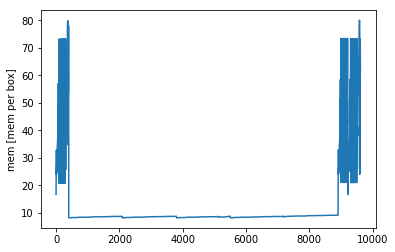

In [144]:
plt.plot(df_1_1['rss_tot']/mb_per_box)
plt.ylabel('mem [mem per box]')
plt.show()

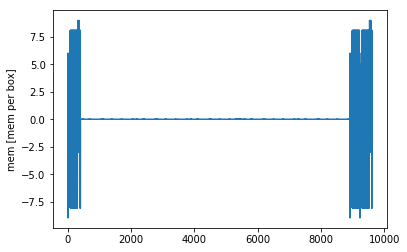

In [145]:
plt.plot(df_1_1['rss_inc']/mb_per_box)
plt.ylabel('mem [mem per box]')
plt.show()

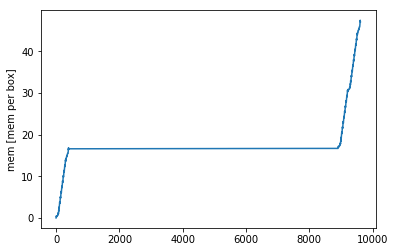

In [147]:
plt.plot(np.cumsum(df_1_1['rss_inc']/mb_per_box))
plt.ylabel('mem [mem per box]')
plt.show()

In [23]:
class Shark:
    num =1
    
    def __init__(self):
        self.my_num = Shark.num
        Shark.num+=1
    

new_shark = Shark()
latest_shark = Shark()
print(new_shark.my_num)
print(latest_shark.my_num)

print(new_shark.num)
print(latest_shark.num)

1
2
3
3


In [14]:
import numpy as np
import os
jj =0
arr = np.load(os.path.join(PATH,'mem_%d.npy'%jj))

In [15]:
arr

array([ 136.876032,  136.876032,  137.007104, ...,  197.373952,
        197.373952,  197.373952])

In [16]:
mb_per_pos=16**3*3*np.float64(5).itemsize/1e6

In [17]:
arr/mb_per_pos

array([ 1392.375     ,  1392.375     ,  1393.70833333, ...,  2007.79166667,
        2007.79166667,  2007.79166667])

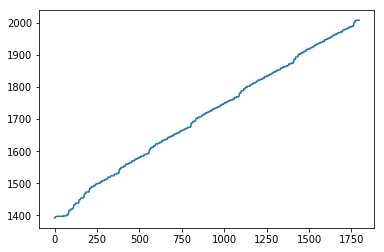

In [18]:
# Tape True
plt.plot(arr/mb_per_pos)

In [ ]:
# return tape=True/False

In [19]:
import numpy as np
import os
jj =0
arr = np.load(os.path.join(PATH,'mem_%d.npy'%jj))

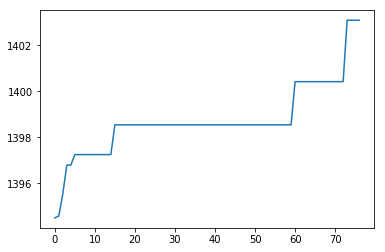

In [20]:
# tape False 
plt.plot(arr/mb_per_pos)

In [23]:
import numpy as np
import os
jj  = 139
arr = np.load(os.path.join(PATH,'mem_%d.npy'%jj))

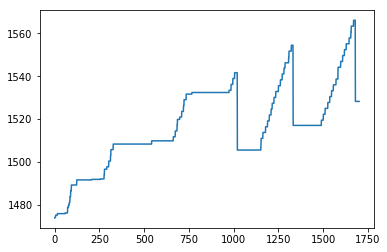

In [24]:
# tape False, -n 1
plt.plot(arr/mb_per_pos)

In [57]:
import numpy as np
import os
jj  = 0
arr = np.load(os.path.join(PATH,'mem_%d_0.npy'%jj))

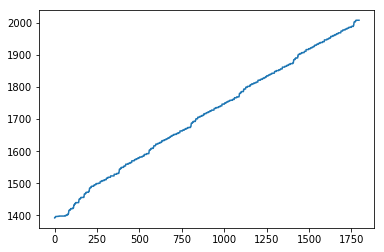

In [58]:
# tape True, -n 1
plt.plot(arr/mb_per_pos)

In [55]:
import numpy as np
import os
jj  = 0
arr = np.load(os.path.join(PATH,'mem_%d_0.npy'%jj))

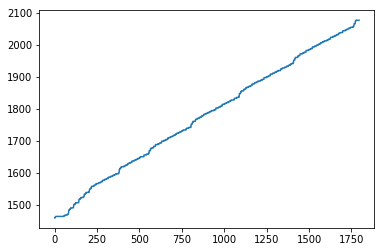

In [56]:
# tape True, -n 1
plt.plot(arr/mb_per_pos)

In [59]:
import numpy as np
import os
jj  = 139
ii  = 21
arr = np.load(os.path.join(PATH,'mem_%d_%d.npy'%(jj,ii)))

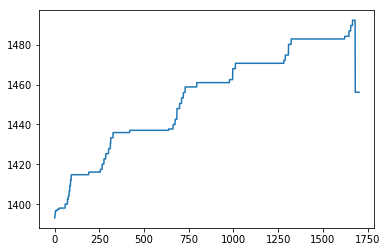

In [60]:
# tape True, -n 1
plt.plot(arr/mb_per_pos)

In [53]:
import numpy as np
import os
jj  = 139
ii  = 21
arr = np.load(os.path.join(PATH,'mem_%d_%d.npy'%(jj,ii)))

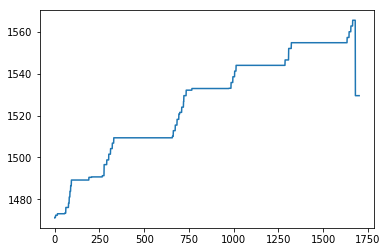

In [54]:
# tape True, -n 1
plt.plot(arr/mb_per_pos)

In [61]:
mb_per_pos=128**3*3*np.float64(5).itemsize/1e6

In [66]:
#Tape = False
import numpy as np
import os
jj  = 139
ii  = 21
arr = np.load(os.path.join(PATH,'mem_%d_%d.npy'%(jj,ii)))

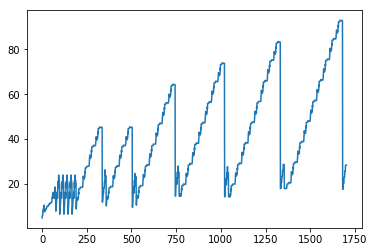

In [67]:
# tape True, -n 1
plt.plot(arr/mb_per_pos)

In [64]:
#128
import numpy as np
import os
jj  = 0
ii  = 0
arr = np.load(os.path.join(PATH,'mem_%d_%d.npy'%(jj,ii)))

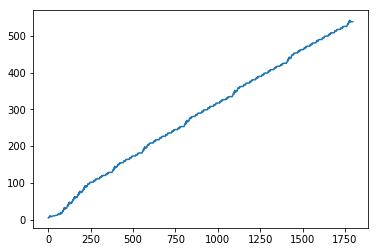

In [65]:
# tape True, -n 1
plt.plot(arr/mb_per_pos)

In [ ]:
# 256, 40, interp True

In [ ]:
import numpy as np
import os
jj  = 0
ii  = 0
arr = np.load(os.path.join(PATH,'mem_%d_%d.npy'%(jj,ii)))

# tape True, -n 1
plt.plot(arr/mb_per_pos)